In [39]:
import pandas as pd
import matplotlib.pyplot as plt

alphas = [0.2, 0.4, 0.5, 0.6, 0.8]

df = pd.DataFrame()

for alpha in alphas:
    df_aux = pd.read_csv(f'data/tests_{alpha}.csv')
    df['problem'] = df_aux['problem']
    df['optimal'] = df_aux['optimal'].astype(int)
    df[f'time_{alpha}'] = df_aux['time']
    df[f'cost_{alpha}'] = df_aux['cost']
    df[f'gap_{alpha}'] = (df_aux['cost'] - df_aux['optimal'])/df_aux['optimal']

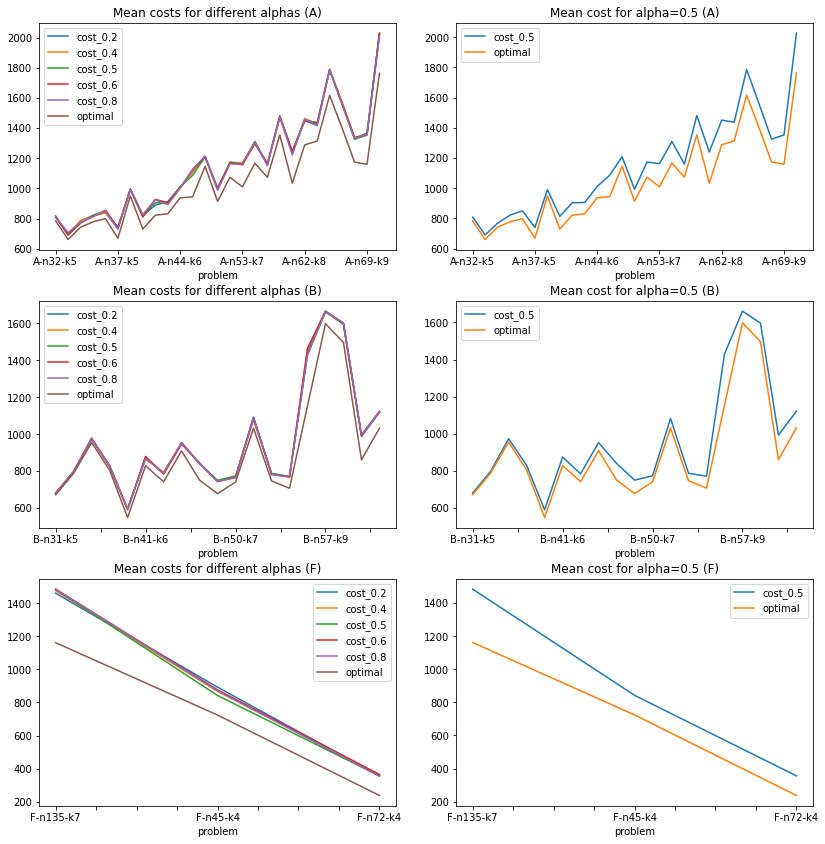

In [43]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

mean_costs = df.groupby(['problem'], as_index=False).mean()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Mean costs for different alphas ({problem})")
    ax[i][1].set_title(f"Mean cost for alpha=0.5 ({problem})")

    mean_costs_p = mean_costs[mean_costs['problem'].str.contains(problem)]
    mean_costs_p.plot(x="problem", ax=ax[i][0], legend=True);
    mean_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[i][1], legend=True);


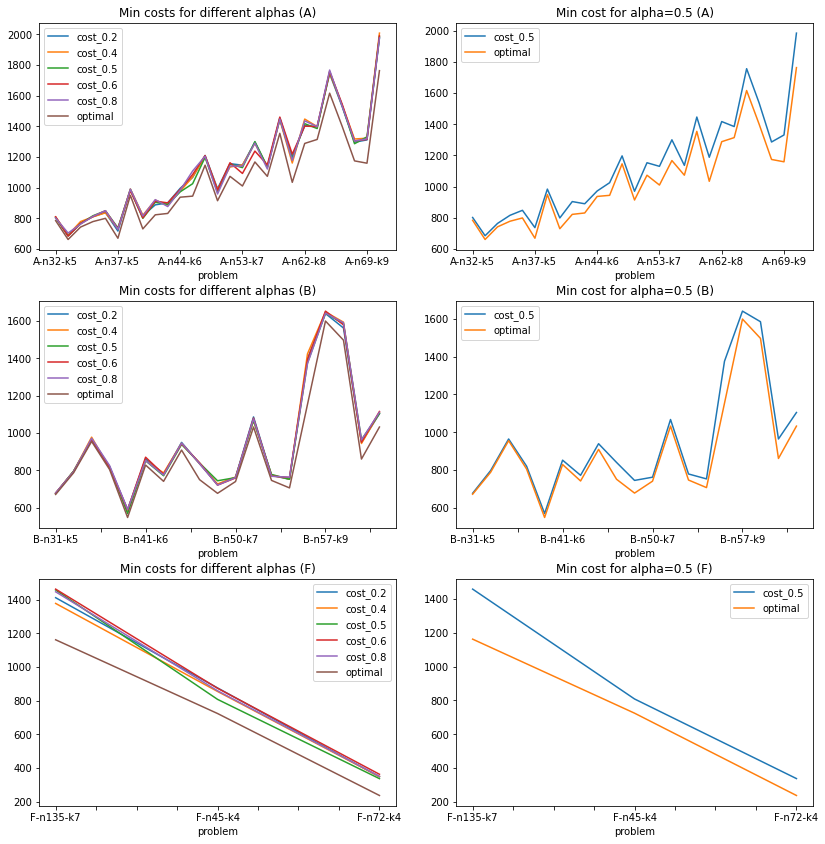

In [44]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

min_costs = df.groupby(['problem'], as_index=False).min()[['problem', 'cost_0.2', 'cost_0.4', 'cost_0.5', 'cost_0.6', 'cost_0.8', 'optimal']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Min costs for different alphas ({problem})")
    ax[i][1].set_title(f"Min cost for alpha=0.5 ({problem})")

    min_costs_p = min_costs[min_costs['problem'].str.contains(problem)]
    min_costs_p.plot(x="problem", ax=ax[i][0], legend=True);
    min_costs_p[['problem', 'cost_0.5', 'optimal']].plot(x="problem", ax=ax[i][1], legend=True);

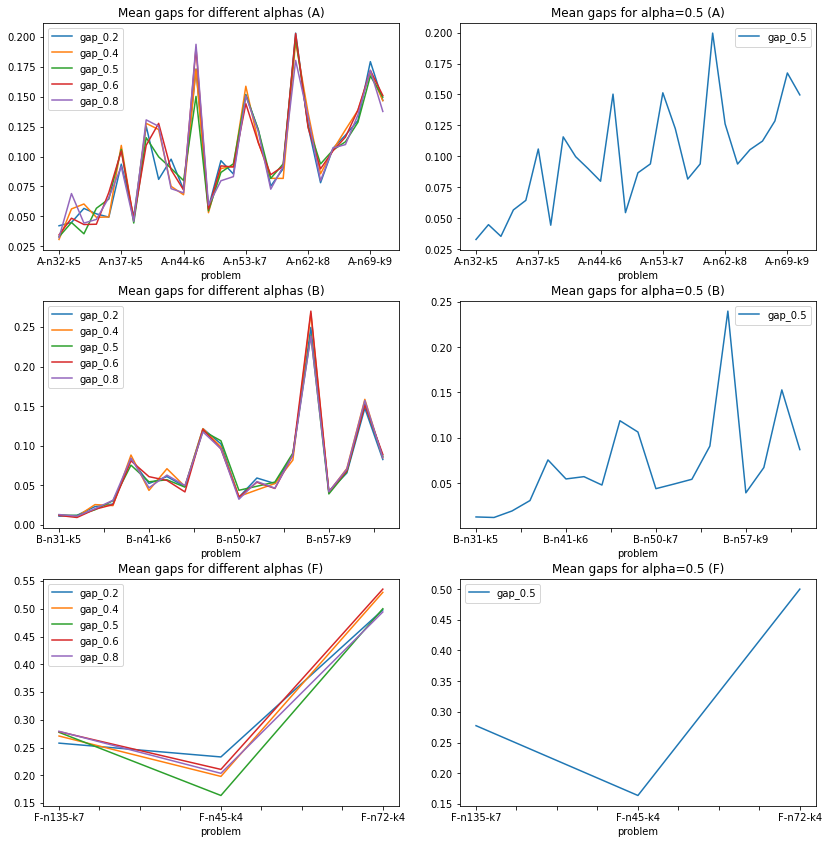

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

mean_gaps = df.groupby(['problem'], as_index=False).mean()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Mean gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Mean gaps for alpha=0.5 ({problem})")

    mean_gaps_p = mean_gaps[mean_gaps['problem'].str.contains(problem)]
    mean_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    mean_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

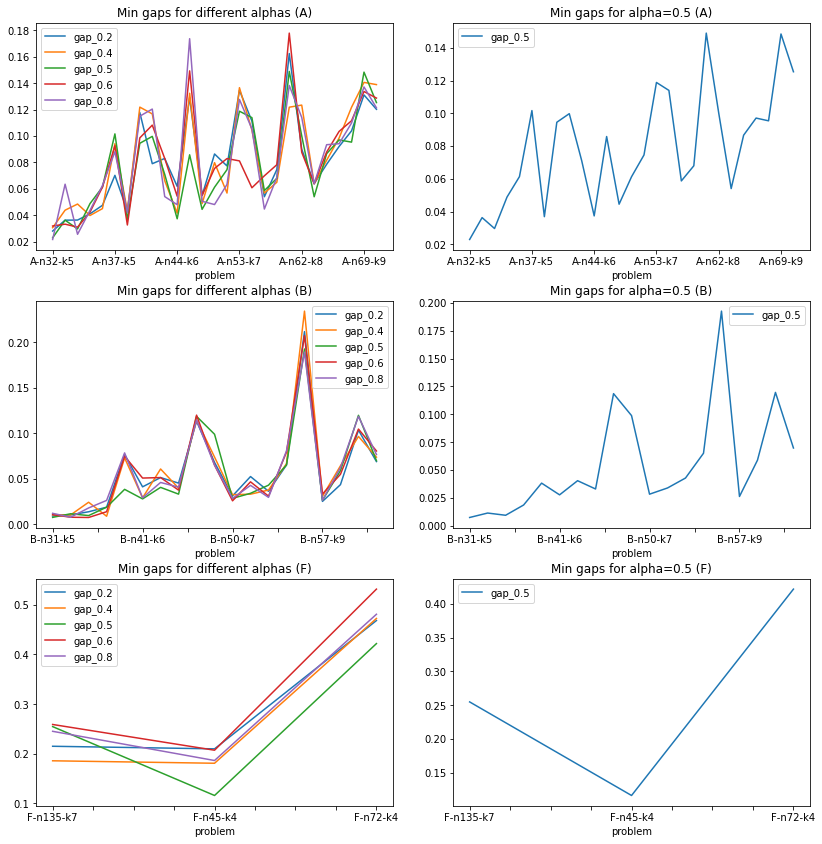

In [48]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 12));
fig. tight_layout(pad=3.0)

min_gaps = df.groupby(['problem'], as_index=False).min()[['problem', 'gap_0.2', 'gap_0.4', 'gap_0.5', 'gap_0.6', 'gap_0.8']]

for i,problem in enumerate(['A', 'B', 'F']):
    ax[i][0].set_title(f"Min gaps for different alphas ({problem})")
    ax[i][1].set_title(f"Min gaps for alpha=0.5 ({problem})")

    min_gaps_p = min_gaps[min_gaps['problem'].str.contains(problem)]
    min_gaps_p.plot(x="problem", ax=ax[i][0], legend=True);
    min_gaps_p[['problem', 'gap_0.5']].plot(x="problem", ax=ax[i][1], legend=True);

In [49]:
alpha = 0.5
mean = df.groupby(['problem'])[[f'optimal', f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].mean().set_axis(['optimal', 'mean_cost', 'mean_time', 'mean_gap'], axis=1)
min = df.groupby(['problem'])[[f'cost_{alpha}', f'time_{alpha}', f'gap_{alpha}']].min().set_axis(['min_cost', 'min_time', 'min_gap'], axis=1)
results = pd.DataFrame()
results = pd.concat([results, mean, min], axis=1)
results = results[['optimal', 'min_cost', 'mean_cost', 'min_gap', 'mean_gap', 'min_time', 'mean_time']]
results['optimal'] = results['optimal'].astype(int)
results

,optimal,min_cost,mean_cost,min_gap,mean_gap,min_time,mean_time
problem,,,,,,,
A-n32-k5,784,802,809.750,0.022959,0.032844,0.20094,0.202995
A-n33-k5,661,685,690.625,0.036309,0.044818,0.20832,0.213575
A-n33-k6,742,764,768.250,0.029650,0.035377,0.24952,0.251157
A-n34-k5,778,816,822.125,0.048843,0.056716,0.21292,0.219454
A-n36-k5,799,848,850.500,0.061327,0.064456,0.22500,0.227670
A-n37-k5,669,737,739.875,0.101644,0.105942,0.24447,0.251798
A-n37-k6,949,984,991.125,0.036881,0.044389,0.30178,0.310931
A-n38-k5,730,799,814.500,0.094521,0.115753,0.23648,0.238695
A-n39-k5,822,904,904.000,0.099757,0.099757,0.24825,0.252530


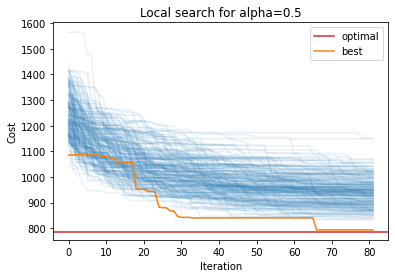

In [50]:
import numpy as np

local_search = pd.read_csv('data/local_search.csv', sep=';', header=None).fillna(method='ffill', axis=1).transpose().astype(int)
fig, ax = plt.subplots();

local_search.plot(ax=ax, color='tab:blue', alpha=0.1, legend=None);
local_search.transpose()[local_search.transpose()[81] == local_search.transpose()[81].min()].transpose().plot(ax=ax, color='tab:orange', label='best')
ax.axhline(y=784, color='tab:red', label='optimal');

handles, labels = ax.get_legend_handles_labels();
ax.legend(reversed(handles), ['optimal', 'best'], loc='best');
ax.set_title("Local search for alpha=0.5");
ax.set_xlabel("Iteration");
ax.set_ylabel("Cost");
